In [36]:
using QuantEcon
using Plots
pyplot()

Plots.PyPlotBackend()

In [37]:
include("src/ez_model.jl")

EpsteinZinSSY

In [38]:
"""
Function to compute spectral radius of a matrix.

"""
compute_spec_rad(Q::Matrix) = maximum(abs, eigvals(Q))


"""
Struct to store parameters of AR1 model

    X' = ρ X + b + σ W

"""
mutable struct AR1{T <: AbstractFloat}
    ρ::T   # Correlation coefficient
    b::T   # Intercept
    σ::T   # Volatility
end


"""
A constructor for AR1 with default values from Pohl, Schmedders and Wilms.

"""
function AR1(; ρ=0.91, b=0.0, σ=0.0343)
    return AR1(ρ, b, σ)
end


"""
Convert a Gaussian AR1 process to a Markov Chain via Rouwenhorst's method.

"""
function ar1_to_mc(ar1::AR1, M::Integer)
    return rouwenhorst(M, ar1.ρ, ar1.σ, ar1.b)
end



ar1_to_mc

In [43]:
ψ=1.5
γ=2.5
β=0.99
ρ=0.05
b=0.0
σ=0.0343
μ=0.02
M=10

10

In [44]:
ez = EpsteinZin(ψ, γ, β)
ar1 = AR1(ρ=ρ, b=b, σ=σ)
mc = ar1_to_mc(ar1, M)

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
[0.00302994 0.0246724 … 0.0122448 0.00123096; 0.00274137 0.0228723 … 0.0132609 0.00136053; … ; 0.00136053 0.0132609 … 0.0228723 0.00274137; 0.00123096 0.0122448 … 0.0246724 0.00302994]

In [45]:
mc.p

10×10 Array{Float64,2}:
 0.00302994  0.0246724  0.0892904  …  0.0541348  0.0122448  0.00123096
 0.00274137  0.0228723  0.084765      0.0574212  0.0132609  0.00136053
 0.00248029  0.0211912  0.0803913     0.06086    0.0143553  0.00150374
 0.00224407  0.019623   0.0761722     0.0644534  0.0155331  0.00166203
 0.00203035  0.0181612  0.0721091     0.0682028  0.0167999  0.00183698
 0.00183698  0.0167999  0.0682028  …  0.0721091  0.0181612  0.00203035
 0.00166203  0.0155331  0.0644534     0.0761722  0.019623   0.00224407
 0.00150374  0.0143553  0.06086       0.0803913  0.0211912  0.00248029
 0.00136053  0.0132609  0.0574212     0.084765   0.0228723  0.00274137
 0.00123096  0.0122448  0.0541348     0.0892904  0.0246724  0.00302994


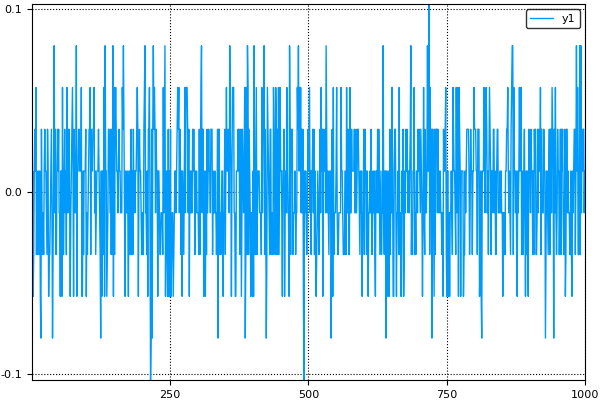

In [46]:
plot(simulate(mc, 1000))

In [47]:
x = mc.state_values
c = 1 - ez.γ
M = length(x)
K = Array{Float64}(M, M)
for i in 1:M
    for j in 1:M
        K[i, j] = exp(c * (μ + x[j] - x[i])) * mc.p[i, j]
    end
end

K = ez.β^ez.θ * K

10×10 Array{Float64,2}:
 0.00307643  0.0242052  0.0846424  …  0.04322    0.00944591  0.000917531
 0.00288069  0.0232232  0.08316       0.0474455  0.0105872   0.00104955 
 0.0026974   0.0222682  0.0816248     0.0520439  0.0118614   0.00120055 
 0.00252577  0.0213406  0.0800431     0.0570426  0.013283    0.00137329 
 0.00236507  0.020441   0.078421      0.0624698  0.0148682   0.00157088 
 0.00221459  0.0195695  0.0767645  …  0.0683554  0.0166346   0.0017969  
 0.00207368  0.0187261  0.075079      0.0747298  0.0186015   0.00205544 
 0.00194174  0.0179108  0.0733702     0.0816248  0.02079     0.00235118 
 0.0018182   0.0171234  0.0716431     0.0890726  0.0232232   0.00268946 
 0.00170251  0.0163638  0.0699027     0.0971063  0.0259262   0.00307643 

In [48]:
compute_spec_rad(K)

1.0153430252803708

In [49]:
ez.θ

-4.499999999999999